# Modelo predicción Cambio de Equipos a 2 Meses

## Contenido
* Importación de librerías
* Cargar datos
* Etiquetado de los datos
* Reducción por identificación
* Selección de datos para modelación
* Tratamiento variables categoricas
 * Variables ordinales
 * Variables nominales
* Guardar elementos para futuras ejecuciones (datos completos)
* Problema1. Predecir si compra un Telefono
 * Preparación sets X y y
 * Balanceo
 * Funciones modelos
 * Modelo LGBM_1
 * Modelo LGBM_2
 * Modelo XGBoost
 * Modelo CatBoost
 * Modelo Random Forset
 * Guardar Modelo Final


## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [116]:
#from lightgbm import LGBMClassifier
import lightgbm as lgm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score,roc_auc_score, f1_score, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from mlxtend.evaluate import lift_score
from datetime import datetime
from joblib import dump,load
from lightgbm import LGBMClassifier

In [4]:
start = datetime.now()

## Carga de los datos

In [11]:
path_data = ''
file= f'GAAVANZADA.TTA_ANALITICA_CAMBIO_EQUI_COMPLETA_FINANCIA_LIFT_202110.csv'

In [12]:
df = pd.read_csv(f'{path_data}{file}', sep='|', decimal='.',error_bad_lines=False)

Columns (0,48) have mixed types.Specify dtype option on import or set low_memory=False.


In [13]:
desc=df.describe()

In [14]:
desc.T

,count,mean,std,min,25%,50%,75%,max
EDAD_MESES,3330057.00,567.24,1015.36,-95726.90,379.00,498.06,649.23,24249.97
CANTIDAD_LINEAS,3347965.00,1.10,0.35,1.00,1.00,1.00,1.00,35.00
TIPO_IDENTIFICACION,3347965.00,1.01,0.15,1.00,1.00,1.00,1.00,4.00
ANTIGUEDAD_MESES,3347965.00,51.47,53.04,0.13,9.77,32.11,76.13,220.13
VLR_CFM,3347965.00,46170.75,23216.59,0.00,32382.37,40102.40,51661.57,3018493.33
CANT_MB_INC_PLAN,3347965.00,2823154.97,17525609.27,0.00,15360.00,25600.00,30720.00,3499999965.00
NUM_UPGRADES,3347965.00,0.02,0.14,0.00,0.00,0.00,0.00,7.00
NUM_DOWNGRADES,3347965.00,0.08,0.29,0.00,0.00,0.00,0.00,12.00
NUM_PARALELO,3347965.00,0.00,0.02,0.00,0.00,0.00,0.00,3.00
FACTURADO_CFM_MM1,3347965.00,38822.96,33631.78,-223600.04,0.00,39900.00,55900.01,3636500.00


In [15]:
len(desc.T)

100

##  Etiquetado de los datos

In [16]:
# llenar nan
df['MANUFACTURER_OR_APPLICANT_MM1'].fillna("SinEquipo", inplace=True)
df['MANUFACTURER_OR_APPLICANT_MM2'].fillna("SinEquipo", inplace=True)

In [17]:
E_MF_MM1=df[['IDENTIFICACION','MANUFACTURER_OR_APPLICANT_MM1']]
E_MF_MM2=df[['IDENTIFICACION','MANUFACTURER_OR_APPLICANT_MM2']]

In [18]:
E_MF_MM1_T=pd.pivot_table(E_MF_MM1, index='IDENTIFICACION', columns='MANUFACTURER_OR_APPLICANT_MM1', aggfunc=len, fill_value=0)

In [19]:
E_MF_MM2_T=pd.pivot_table(E_MF_MM2, index='IDENTIFICACION', columns='MANUFACTURER_OR_APPLICANT_MM2', aggfunc=len, fill_value=0)

In [20]:
cols=list(set(np.concatenate((E_MF_MM1_T.columns.values,E_MF_MM2_T.columns.values))))

In [21]:
E_MF=(E_MF_MM1_T+E_MF_MM2_T)

In [22]:
E_MF["Total"]=E_MF.drop('SinEquipo',1).sum(axis=1)

In [23]:
for col in cols+['Total'] :
    E_MF[col]=np.where(E_MF[col]>0,1,0)

## Reducción por IDENTIFICICACIÓN

In [24]:
variableRechazadas=['MSISDN','TAC','CO_ID','TELE_NUMB','MANUFACTURER_OR_APPLICANT_MM1','MANUFACTURER_OR_APPLICANT_MM2','SITIO']

In [25]:
tablaAnalisis=df.copy()

In [26]:
tablaAnalisis['ESTRATO']=tablaAnalisis['ESTRATO'].fillna(0)
tablaAnalisis['ESTRATO']=np.where(tablaAnalisis['ESTRATO']=='nulo',0,tablaAnalisis['ESTRATO'])
tablaAnalisis['ESTRATO']=tablaAnalisis['ESTRATO'].astype(int)

In [27]:
#validacion Duplicados

In [28]:
tablaAnalisis=tablaAnalisis.drop(columns=variableRechazadas).drop_duplicates()

In [29]:
tablaAnalisis.set_index('IDENTIFICACION', inplace=True)

In [30]:
## llenado de nan
tablaAnalisis=tablaAnalisis.fillna(0)

##  Seleccion datos para modelación

In [31]:
E_MF['Total'].value_counts()

0    3248659
1      96209
Name: Total, dtype: int64

In [32]:
E_MF_1=E_MF[E_MF['Total']==1]

In [33]:
b1=len(E_MF_1)
b1

96209

In [34]:
bT=len(E_MF)
bT

3344868

In [35]:
porporcion_1s=b1/bT
porporcion_1s

0.028763167933682287

In [36]:
#b1_train=200000 automatizar
b1_train=b1*0.8

In [37]:
b1_train

76967.2

In [38]:
b1_test=b1-b1_train
b1_test

19241.800000000003

In [39]:
b0_test=int(b1_test/porporcion_1s)
b0_test

668973

In [40]:
#b0_train=400000
b0_train=b1_train*2
b0_train

153934.4

In [41]:
num_sample_b0=b0_train+b0_test
int(num_sample_b0)

822907

In [42]:
E_MF_0=E_MF[E_MF['Total']==0].sample(n=int(num_sample_b0), random_state=1)

In [43]:
E_MF = E_MF_1.append(E_MF_0)

In [44]:
len(E_MF)

919116

In [45]:
b0_train+b0_test+b1_train+b1_test

919116.4

In [46]:
tablaAnalisis=tablaAnalisis[tablaAnalisis.index.isin(E_MF.index)]

## Tratamiento de variables categoricas

* listar variables categoricas
* agrupar entre nominales y ordinales  (si es necesario preguntar)

In [47]:
colCategoricas=tablaAnalisis.select_dtypes('object').columns
colNumericas=tablaAnalisis.select_dtypes(exclude='object').columns

In [48]:
colCatNom=['DEPARTAMENTO','TIPO_MUNICIPIO','MARKETING_NAME','MANUFACTURER','COD_PLAN_ACTUAL',
           'OPERADOR_4GBEST_DW','OPERADOR_4GBEST_UP','OPERADOR_4GBEST_LA',
           'OPERADOR_4GBEST_DB','OPERADOR_4GCLARO','OPERADOR_3GBEST_DW', 'OPERADOR_3GBEST_UP', 'OPERADOR_3GBEST_LA',
           'OPERADOR_3GBEST_DB', 'OPERADOR_3GCLARO', 'OPERADOR_CLARO']
colBinning=['DEPARTAMENTO','COD_PLAN_ACTUAL','MARKETING_NAME','MANUFACTURER']
colCatOrd=['COMPORTAMIENTO_PAGO','MIN_CALIFICACION_CREDITO','MAX_CALIFICACION_CREDITO',
           'TECH_EQUIPO','TECNOLOGIA_EQUIPO',
           'TENDENCIA_CHURN_GSM','TENDENCIA_CHURN_LTE','TENDENCIA_CHURN_UMTS',
           'TENDENCIA_DOWN_4G_CLARO','TENDENCIA_DOWN_4G_BEST',
           'TENDENCIA_LLAMADAS_GSM', 'TENDENCIA_LLAMADAS_UTMS','TENDENCIA_LLAMADAS_LTE',
           'CL_TASA_CHURN','CL_CHURN_LATENCIA_4G']

### Variables Ordinales

In [49]:
for col in colCatOrd:
    tablaAnalisis[col] = tablaAnalisis[col].astype('category')

#### Definir Orden

In [50]:
tablaAnalisis['COMPORTAMIENTO_PAGO'].unique()

['BUENO', 'MUY BUENO', 'ALTO RIESGO', 'REGULAR', 'NUEVO', 0]
Categories (6, object): ['BUENO', 'MUY BUENO', 'ALTO RIESGO', 'REGULAR', 'NUEVO', 0]

In [51]:
#tablaAnalisis['COMPORTAMIENTO_PAGO'].cat.reorder_categories([0,'ALTO RIESGO','REGULAR','BUENO','MUY BUENO'], inplace=True)
tablaAnalisis['COMPORTAMIENTO_PAGO'].cat.reorder_categories([0,'ALTO RIESGO','REGULAR','BUENO','MUY BUENO','NUEVO'], inplace=True)

In [52]:
tablaAnalisis['TENDENCIA_CHURN_GSM'].cat.reorder_categories([0,'decreasing','no trend','increasing'], inplace=True)

In [53]:
tablaAnalisis['TENDENCIA_CHURN_LTE'].cat.reorder_categories([0,'decreasing','no trend','increasing'], inplace=True)

In [54]:
tablaAnalisis['TENDENCIA_CHURN_UMTS'].cat.reorder_categories([0,'decreasing','no trend','increasing'], inplace=True)

In [55]:
tablaAnalisis['TENDENCIA_DOWN_4G_CLARO'].cat.reorder_categories([0,'decreasing','no trend','increasing'], inplace=True)

In [56]:
tablaAnalisis['TENDENCIA_DOWN_4G_BEST'].cat.reorder_categories([0,'decreasing','no trend','increasing'], inplace=True)

In [57]:
tablaAnalisis['TENDENCIA_LLAMADAS_GSM'].cat.reorder_categories([0,'decreasing','no trend','increasing'], inplace=True)

In [58]:
tablaAnalisis['TENDENCIA_LLAMADAS_UTMS'].cat.reorder_categories([0,'decreasing','no trend','increasing'], inplace=True)

In [59]:
tablaAnalisis['TENDENCIA_LLAMADAS_LTE'].cat.reorder_categories([0,'no trend'], inplace=True)

In [60]:
tablaAnalisis['MIN_CALIFICACION_CREDITO'].cat.reorder_categories(['SIN_ESTUDIO','P-PREPAGO','7-POSPAGO','5-POSPAGO','E-POSPAGO','D-POSPAGO','C-POSPAGO','B-POSPAGO','A-POSPAGO'], inplace=True)

In [61]:
tablaAnalisis['MAX_CALIFICACION_CREDITO'].cat.reorder_categories(['SIN_ESTUDIO','P-PREPAGO','7-POSPAGO','5-POSPAGO','E-POSPAGO','D-POSPAGO','C-POSPAGO','B-POSPAGO','A-POSPAGO'], inplace=True)

In [62]:
tablaAnalisis['TECH_EQUIPO'].cat.reorder_categories([0,'2G','3G','4G'], inplace=True)

In [63]:
list(tablaAnalisis['TECNOLOGIA_EQUIPO'].unique())

['4G', '2G', '3G', 'LTE', 0]

In [64]:
tablaAnalisis['TECNOLOGIA_EQUIPO'].cat.reorder_categories([0,'2G','3G','LTE','4G'], inplace=True)

In [65]:
tablaAnalisis['CL_TASA_CHURN'].cat.reorder_categories([0,'B-B','B-A','A-B','A-A'], inplace=True)

In [66]:
tablaAnalisis['CL_CHURN_LATENCIA_4G'].cat.reorder_categories([0,'B-B','B-A'], inplace=True)

#####   Guardar categorias en diccionario y cambio tipo de dato

In [67]:
cats=tablaAnalisis['COMPORTAMIENTO_PAGO'].cat.categories
cats

Index([0, 'ALTO RIESGO', 'REGULAR', 'BUENO', 'MUY BUENO', 'NUEVO'], dtype='object')

In [68]:
codes=tablaAnalisis['COMPORTAMIENTO_PAGO'].cat.codes

In [69]:
dicCategoris={}
for col in colCatOrd:
    cats=tablaAnalisis[col].cat.categories
    dicCategoris[col]=cats
    tablaAnalisis[col]=tablaAnalisis[col].cat.codes    

### Variables Nominales 

In [70]:
for col in colCatNom:    
    tablaAnalisis[col]=tablaAnalisis[[col]].applymap(str)

In [71]:
#binning

In [72]:
#colBinning
dicNominals={}

In [73]:
for col in colBinning:
    auxBin=tablaAnalisis[col].value_counts().nlargest(5).index.tolist()
    dicNominals[col]=auxBin
    tablaAnalisis[col]=np.where(tablaAnalisis[col].isin(auxBin), tablaAnalisis[col] , 'OTRO')

#####  Columnas para one hot encoding

In [74]:
colsinNom=tablaAnalisis.drop(columns=colCatNom).columns.values.tolist()

### limpiar Memoria

In [75]:
import gc
del E_MF_MM1_T
del E_MF_MM2_T
#del E_MF_MM1
#del E_MF_MM2
#del E_MF_1
#del E_MF_0
#del E_MF
del df
#del dup
gc.collect()

120

In [76]:
class_ohe = OneHotEncoder(handle_unknown="ignore")
class_ohe = class_ohe.fit(tablaAnalisis[colCatNom])
tablaAnalisis_class_ohe = class_ohe.transform(tablaAnalisis[colCatNom]).toarray()
colDummies=class_ohe.get_feature_names(colCatNom)

In [79]:
###  Guardar objeto Class_ohe
ruta_objeto= f"modeloEntrenado_new/class_ohe.pkl"
dump(class_ohe, ruta_objeto)

['modeloEntrenado_new/class_ohe.pkl']

In [80]:
colsFinal=colsinNom
colsFinal.extend(colDummies)

In [81]:
colsNotNoms=tablaAnalisis.drop(columns=colCatNom).columns

In [82]:
tablaAnalisisFinal=pd.DataFrame(np.concatenate((tablaAnalisis.drop(columns=colCatNom), tablaAnalisis_class_ohe), axis=1),index=tablaAnalisis.index, columns=colsFinal)

In [83]:
X_columns=tablaAnalisisFinal.columns

In [84]:
tablaAnalisisComp=tablaAnalisisFinal.join(E_MF)

###  corregir tipos de datos

In [85]:
col='EDAD_MESES'
tablaAnalisis.dtypes[col]

dtype('float64')

In [86]:
for col in colsNotNoms:
    tablaAnalisisComp[col]=tablaAnalisisComp[col].astype(tablaAnalisis.dtypes[col])

In [87]:
for col in colDummies:
    tablaAnalisisComp[col]=tablaAnalisisComp[col].astype('int64')

### fin tratamiento variables categoricas

## Guardar elementos para futuras ejecuciones

###  Tabla Generadora

In [88]:
GtableCategorical=pd.DataFrame.from_dict(dicCategoris, orient='index').T.fillna(0)

In [89]:
GtableCategorical

,COMPORTAMIENTO_PAGO,MIN_CALIFICACION_CREDITO,MAX_CALIFICACION_CREDITO,TECH_EQUIPO,TECNOLOGIA_EQUIPO,TENDENCIA_CHURN_GSM,TENDENCIA_CHURN_LTE,TENDENCIA_CHURN_UMTS,TENDENCIA_DOWN_4G_CLARO,TENDENCIA_DOWN_4G_BEST,TENDENCIA_LLAMADAS_GSM,TENDENCIA_LLAMADAS_UTMS,TENDENCIA_LLAMADAS_LTE,CL_TASA_CHURN,CL_CHURN_LATENCIA_4G
0,0,SIN_ESTUDIO,SIN_ESTUDIO,0,0,0,0,0,0,0,0,0,0,0,0
1,ALTO RIESGO,P-PREPAGO,P-PREPAGO,2G,2G,decreasing,decreasing,decreasing,decreasing,decreasing,decreasing,decreasing,no trend,B-B,B-B
2,REGULAR,7-POSPAGO,7-POSPAGO,3G,3G,no trend,no trend,no trend,no trend,no trend,no trend,no trend,0,B-A,B-A
3,BUENO,5-POSPAGO,5-POSPAGO,4G,LTE,increasing,increasing,increasing,increasing,increasing,increasing,increasing,0,A-B,0
4,MUY BUENO,E-POSPAGO,E-POSPAGO,0,4G,0,0,0,0,0,0,0,0,A-A,0
5,NUEVO,D-POSPAGO,D-POSPAGO,0,0,0,0,0,0,0,0,0,0,0,0
6,0,C-POSPAGO,C-POSPAGO,0,0,0,0,0,0,0,0,0,0,0,0
7,0,B-POSPAGO,B-POSPAGO,0,0,0,0,0,0,0,0,0,0,0,0
8,0,A-POSPAGO,A-POSPAGO,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
GtableNominales=pd.DataFrame.from_dict(dicNominals, orient='index').T.fillna(0)

In [91]:
GtableNominales

,DEPARTAMENTO,COD_PLAN_ACTUAL,MARKETING_NAME,MANUFACTURER
0,BOGOTA D C,25017-4103,Galaxy A21s,Samsung
1,ANTIOQUIA,25867-4103,Galaxy A30s,HUAWEI
2,CUNDINAMARCA,25522-6734,HUAWEI Y9 Prime 2019,Motorola
3,VALLE DEL CAUCA,24231-4103,Redmi Note 8,Redmi
4,BOYACA,23863-4103,Redmi Note 9,Apple


#####  Guardar elementos 

In [92]:
GtableCategorical.to_csv('modeloEntrenado_new/GtableCategorical.csv', index=True)

In [93]:
GtableNominales.to_csv('modeloEntrenado_new/GtableNominales.csv', index=True) 

In [94]:
# Limpieza Memoria
del E_MF
del tablaAnalisisFinal
#del shap_test
gc.collect()

64

## Problema1. Predecir si compra un Telefono

###  Preparación sets X y y

In [95]:
table_1s=tablaAnalisisComp[tablaAnalisisComp['Total']==1]
table_0s=tablaAnalisisComp[tablaAnalisisComp['Total']==0]

In [96]:
print(len(table_1s),len(table_0s))

96209 822907


In [97]:
X_Var_1s=table_1s[X_columns]
y_Var_1s=table_1s['Total']
X_Var_0s=table_0s[X_columns]
y_Var_0s=table_0s['Total']

In [98]:
test_size_1s=b1_test/(b1_test+b1_train)
test_size_0s=b0_test/(b0_test+b0_train)

In [99]:
X_train_1s, X_test_1s, y_train_1s, y_test_1s = train_test_split(X_Var_1s, y_Var_1s, test_size = test_size_1s, random_state = 86)

In [100]:
X_train_0s, X_test_0s, y_train_0s, y_test_0s = train_test_split(X_Var_0s, y_Var_0s, test_size = test_size_0s, random_state = 86)

In [101]:
len(X_train_1s), len(X_test_1s), len(y_train_1s), len(y_test_1s)

(76967, 19242, 76967, 19242)

In [102]:
len(X_train_0s), len(X_test_0s), len(y_train_0s), len(y_test_0s)

(153934, 668973, 153934, 668973)

In [103]:
#aqui vamos

In [104]:
X_train=X_train_1s
X_train=X_train.append(X_train_0s)

In [105]:
#len(['SIN_ESTUDIO','P-PREPAGO','7-POSPAGO','5-POSPAGO','E-POSPAGO','D-POSPAGO','C-POSPAGO','B-POSPAGO','A-POSPAGO'])

In [106]:
X_test=X_test_1s
X_test=X_test.append(X_test_0s)

In [107]:
y_train=y_train_1s
y_train=y_train.append(y_train_0s)

In [108]:
y_test=y_test_1s
y_test=y_test.append(y_test_0s)

In [109]:
del test_size_1s
del test_size_0s
del X_train_1s
del X_test_1s
del y_train_1s
del y_test_1s
del X_train_0s
del X_test_0s
del y_train_0s
del y_test_0s
gc.collect()

0

### Balanceo

In [110]:
def sampling_strategy(X,y,n_samples,t='majority'):
    target_classes=''
    if t== 'majority':
        target_classes= y.value_counts() >n_samples
    elif t== 'minority':
        target_classes = y.value_counts() < n_samples
    tc=target_classes[target_classes ==True].index
    #target_classes_all=y.value_counts().index
    sampling_strategy={}
    for target in tc:
        sampling_strategy[target]= n_samples
    return sampling_strategy

In [111]:
## con balanceo
count=y_train.value_counts()
n_samples=int(count.max())
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_train, y_train,n_samples,t='minority'),k_neighbors=2)
X_train_res, y_train_res= over_sampler.fit_resample(X_train,y_train)
X_train_res=X_train
y_train_res=y_train

###  Funciones Modelos

In [112]:
def plot_Lift_curve(y_val, y_pred, step=0.01):    
    aux_lift = pd.DataFrame()    
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred    
    aux_lift.sort_values('predicted',ascending=False,inplace=True)    
    x_val = np.arange(step,1+step,step)    
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    y_v = []
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)   
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

###  Modelo LGBM1

In [117]:
modelLGBM=LGBMClassifier(n_estimators=500, learning_rate=0.01, reg_alpha=1, reg_lambda=3)

In [118]:
modelLGBM.fit(X_train_res, y_train_res,eval_metric= 'auc')

LGBMClassifier(learning_rate=0.01, n_estimators=500, reg_alpha=1, reg_lambda=3)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


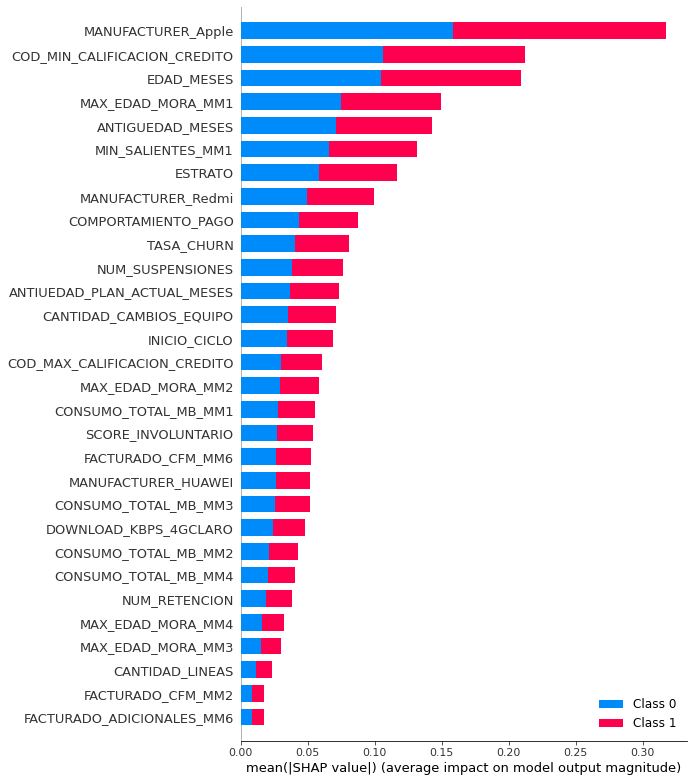

<Figure size 432x288 with 0 Axes>

In [119]:
shap_test = X_train_res.sample(5000)
shap_values = shap.TreeExplainer(modelLGBM).shap_values(shap_test)
plt.figure()
shap.summary_plot(shap_values, shap_test,max_display=30)
plt.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.3)
plt.show()

In [120]:
pred_train_proba=modelLGBM.predict_proba(X_train_res)[:,1]
pred_train=modelLGBM.predict(X_train_res)
pred_test_proba=modelLGBM.predict_proba(X_test)[:,1]
pred_test=modelLGBM.predict(X_test)

<AxesSubplot:>

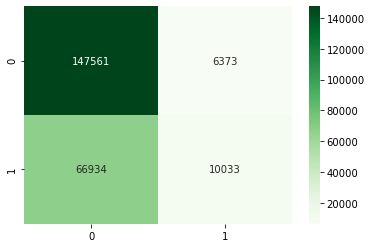

In [121]:
matrizConfucion = confusion_matrix(y_train_res, pred_train)
sns.heatmap(matrizConfucion, annot = True,fmt='', cmap = 'Greens')

<AxesSubplot:>

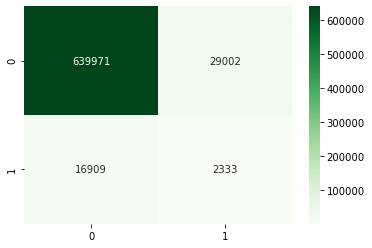

In [122]:
matrizConfucion = confusion_matrix(y_test, pred_test)
sns.heatmap(matrizConfucion, annot = True,fmt='', cmap = 'Greens')

In [123]:
print(f'AUC en entrenamiento: {round(roc_auc_score(y_train_res,pred_train_proba),5)}')
print(f"AUC en test: {round(roc_auc_score(y_test,pred_test_proba),5)}")

AUC en entrenamiento: 0.68754
AUC en test: 0.67461


In [124]:
print(f'precision: {round(precision_score(y_train_res, pred_train),2)}')
print(f'precision: {round(precision_score(y_test, pred_test),2)}')

precision: 0.61
precision: 0.07


In [125]:
print(f'recall: {round(recall_score(y_train_res, pred_train),2)}')
print(f'recall: {round(recall_score(y_test, pred_test),2)}')                 
#recall_score(y_train_5, y_train_pred)

recall: 0.13
recall: 0.12


###  Modelo LGBM_2

In [126]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
#import neptunecontrib.monitoring.skopt as sk_utils
import lightgbm as lgb
#import neptune
#import skopt
import sys
import os

In [127]:
"""SEARCH_PARAMS = {'learning_rate': 0.4,
                'max_depth': 15,
                'num_leaves': 32,
                'feature_fraction': 0.8,
                'subsample': 0.2}"""

"SEARCH_PARAMS = {'learning_rate': 0.4,\n                'max_depth': 15,\n                'num_leaves': 32,\n                'feature_fraction': 0.8,\n                'subsample': 0.2}"

In [128]:
FIXED_PARAMS={'objective': 'binary',
             'metric': 'auc',
             'is_unbalance':True,
             'bagging_freq':5,
             'boosting':'dart',
             'num_boost_round':300,
             'early_stopping_rounds':30}

In [129]:
# https://neptune.ai/blog/lightgbm-parameters-guide
def train_evaluate(search_params):   
   train_data = lgb.Dataset(X_train_res, label=y_train_res)
   valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

   params = {'metric':FIXED_PARAMS['metric'],
             'objective':FIXED_PARAMS['objective'],
             **search_params}

   model = lgb.train(params, train_data,                     
                     valid_sets=[valid_data],
                     num_boost_round=FIXED_PARAMS['num_boost_round'],
                     early_stopping_rounds=FIXED_PARAMS['early_stopping_rounds'],
                     valid_names=['valid'])
   score = model.best_score['valid']['auc']
   return score, model

In [130]:
"""SEARCH_PARAMS = {'learning_rate': 0.1,
                'max_depth': 15,
                'num_leaves': 32,
                'feature_fraction': 0.8,
                'subsample': 0.2}"""

"SEARCH_PARAMS = {'learning_rate': 0.1,\n                'max_depth': 15,\n                'num_leaves': 32,\n                'feature_fraction': 0.8,\n                'subsample': 0.2}"

In [131]:
"""SEARCH_PARAMS = {'learning_rate': 0.1,
                'max_depth': 15,
                'num_leaves': 50,
                'feature_fraction': 0.8,
                'subsample': 0.2}"""

"SEARCH_PARAMS = {'learning_rate': 0.1,\n                'max_depth': 15,\n                'num_leaves': 50,\n                'feature_fraction': 0.8,\n                'subsample': 0.2}"

In [161]:
SEARCH_PARAMS={'learning_rate': 0.1,
                'max_depth': 10,
                'num_leaves': 50,
                'feature_fraction': 1,
                'subsample': 0.2}

In [162]:
# Modelo final

In [163]:
lgb2_Score,modelLGBM2= train_evaluate(SEARCH_PARAMS)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 76967, number of negative: 153934
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17991
[LightGBM] [Info] Number of data points in the train set: 230901, number of used features: 201
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[1]	valid's auc: 0.639757
Training until validation scores don't improve for 30 rounds
[2]	valid's auc: 0.642696
[3]	valid's auc: 0.645846
[4]	valid's auc: 0.647402
[5]	valid's auc: 0.649494
[6]	valid's auc: 0.652022
[7]	valid's auc: 0.653493
[8]	valid's auc: 0.654345
[9]	va

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


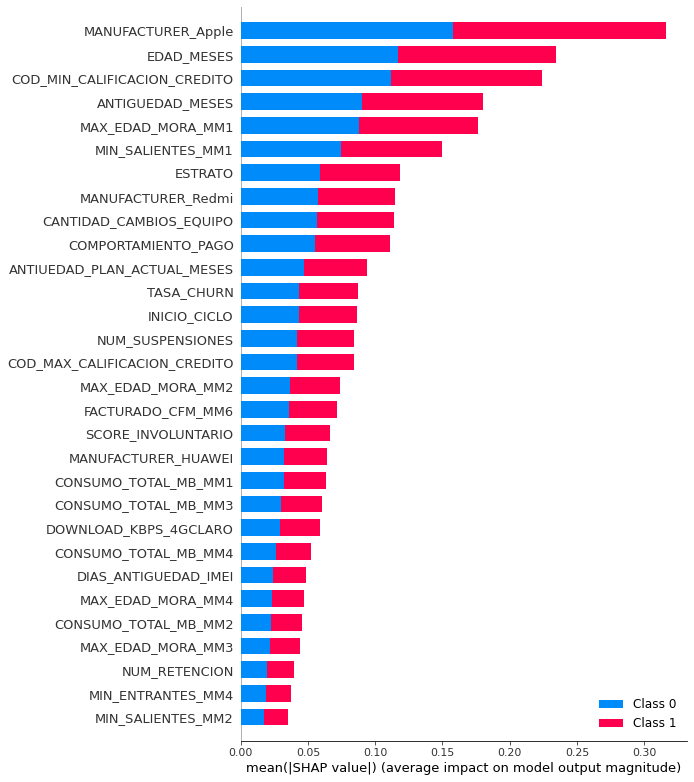

<Figure size 432x288 with 0 Axes>

In [135]:
shap_test = X_train_res.sample(5000)
#shap_test = X_train
shap_values = shap.TreeExplainer(modelLGBM2).shap_values(shap_test)
plt.figure()
shap.summary_plot(shap_values, shap_test,max_display=30)
plt.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.3)
plt.show()

In [136]:
#ruta_modelo = f"modelLGBM2.pkl"
#modelLGBM2 = load(ruta_modelo)

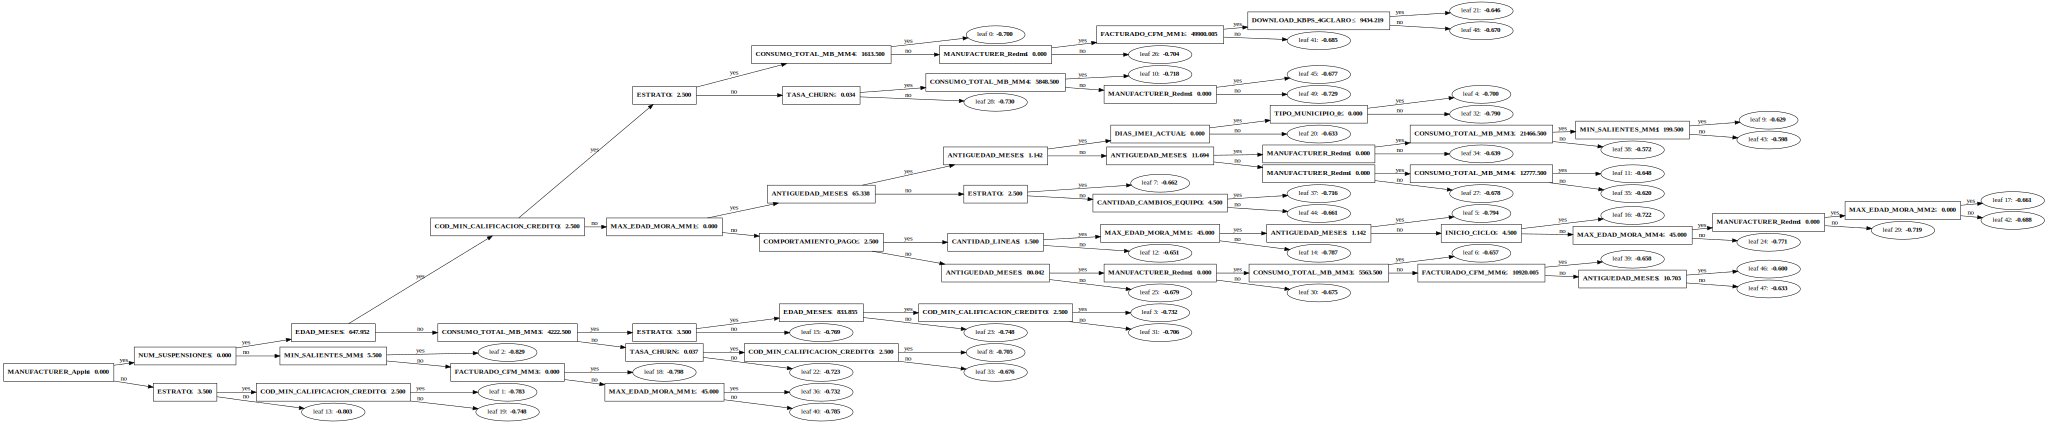

In [137]:
lgm.create_tree_digraph(modelLGBM2)

#### Determinar punto de corte

In [164]:
pred_train=modelLGBM2.predict(X_train_res)
pred_test=modelLGBM2.predict(X_test)

In [165]:
pred_test>0.5

array([False,  True,  True, ..., False, False, False])

In [166]:
len(X_train_res)

230901

In [167]:
len(X_test)

688215

In [168]:
for i in range (1,10):
    print(i/10)
    pred_train_C=pred_train>i/10
    pred_test_C=pred_test>i/10
    print(f'precision_Train: {round(precision_score(y_train_res, pred_train_C),2)}'+f'  precision_Test: {round(precision_score(y_test, pred_test_C),2)}')
    print(f'recall_ Train: {round(recall_score(y_train_res, pred_train_C),2)}'+f'  recall_Test: {round(recall_score(y_test, pred_test_C),2)}')
    print(f'AUC_Train: {round(roc_auc_score(y_train_res,pred_train_C),5)}'+f"  AUC_test: {round(roc_auc_score(y_test,pred_test_C),5)}")
    print(f'LIFT_Train: {round(lift_score(y_train_res,pred_train_C),5)}'+f"  LIFT_test: {round(lift_score(y_test, pred_test_C),5)}")     
    matrizConfucion = confusion_matrix(y_test, pred_test_C)
    print(matrizConfucion)
    """
    if(i==5):
        for j in range (1,10):
            print(i/10+j/100)
            pred_train_C=pred_train>(i/10+j/100)
            pred_test_C=pred_test>(i/10+j/100)
            print(f'precision_Train: {round(precision_score(y_train_res, pred_train_C),2)}'+f'  precision_Test: {round(precision_score(y_test, pred_test_C),2)}')
            print(f'recall_ Train: {round(recall_score(y_train_res, pred_train_C),2)}'+f'  recall_Test: {round(recall_score(y_test, pred_test_C),2)}')
            print(f'AUC_Train: {round(roc_auc_score(y_train_res,pred_train_C),5)}'+f"  AUC_test: {round(roc_auc_score(y_test,pred_test_C),5)}")
            print(f'LIFT_Train: {round(lift_score(y_train_res,pred_train_C),5)}'+f"  LIFT_test: {round(lift_score(y_test, pred_test_C),5)}")     
            matrizConfucion = confusion_matrix(y_test, pred_test_C)
            print(matrizConfucion)"""
        

0.1
precision_Train: 0.35  precision_Test: 0.03
recall_ Train: 1.0  recall_Test: 0.99
AUC_Train: 0.53694  AUC_test: 0.53325
LIFT_Train: 1.05203  LIFT_test: 1.06977
[[ 50397 618576]
 [   170  19072]]
0.2
precision_Train: 0.39  precision_Test: 0.03
recall_ Train: 0.96  recall_Test: 0.94
AUC_Train: 0.5994  AUC_test: 0.58444
LIFT_Train: 1.16088  LIFT_test: 1.21235
[[155002 513971]
 [  1209  18033]]
0.3
precision_Train: 0.45  precision_Test: 0.04
recall_ Train: 0.82  recall_Test: 0.77
AUC_Train: 0.65956  AUC_test: 0.62377
LIFT_Train: 1.34906  LIFT_test: 1.4526
[[317946 351027]
 [  4382  14860]]
0.4
precision_Train: 0.55  precision_Test: 0.05
recall_ Train: 0.53  recall_Test: 0.46
AUC_Train: 0.65708  AUC_test: 0.61055
LIFT_Train: 1.65438  LIFT_test: 1.86229
[[506379 162594]
 [ 10311   8931]]
0.5
precision_Train: 0.68  precision_Test: 0.07
recall_ Train: 0.22  recall_Test: 0.18
AUC_Train: 0.58448  AUC_test: 0.55579
LIFT_Train: 2.02685  LIFT_test: 2.51103
[[623044  45929]
 [ 15774   3468]]
0.6

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


recall_ Train: 0.0  recall_Test: 0.0
AUC_Train: 0.5  AUC_test: 0.5
LIFT_Train: nan  LIFT_test: nan


invalid value encountered in double_scalars


[[668973      0]
 [ 19242      0]]


*   El corte esta entre 0.3 y 0.5
*   Lift 0.6

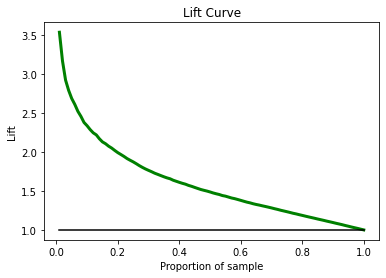

In [143]:
plot_Lift_curve(y_test,pred_test)

#### Modelo XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
modelXGB = XGBClassifier()
modelXGB.fit(X_train_res, y_train_res)

In [ ]:
pred_train=modelXGB.predict_proba(X_train_res)[:,1]
pred_test=modelXGB.predict_proba(X_test)[:,1]

In [ ]:
for i in range (1,10):
    print(i/10)
    pred_train_C=pred_train>=i/10
    pred_test_C=pred_test>=i/10
    print(f'precision_Train: {round(precision_score(y_train_res, pred_train_C),2)}'+f'  precision_Test: {round(precision_score(y_test, pred_test_C),2)}')
    print(f'recall_ Train: {round(recall_score(y_train_res, pred_train_C),2)}'+f'  recall_Test: {round(recall_score(y_test, pred_test_C),2)}')
    print(f'AUC_Train: {round(roc_auc_score(y_train_res,pred_train_C),5)}'+f"  AUC_test: {round(roc_auc_score(y_test,pred_test_C),5)}")
    print(f'LIFT_Train: {round(lift_score(y_train_res,pred_train_C),5)}'+f"  LIFT_test: {round(lift_score(y_test, pred_test_C),5)}")     
    matrizConfucion = confusion_matrix(y_test, pred_test_C)
    print(matrizConfucion)

In [ ]:
plot_Lift_curve(y_test,pred_test)

In [ ]:
shap_test = X_train_res.sample(5000)
#shap_test = X_train
shap_values = shap.TreeExplainer(modelXGB).shap_values(shap_test)
plt.figure()
shap.summary_plot(shap_values, shap_test,max_display=30)
plt.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.3)
plt.show()

### Modelo CatBoost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
modelCat = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)

In [ ]:
cat_features = [0, 1]

In [ ]:
modelCat.fit(X_train_res, y_train_res)

In [ ]:
pred_train=modelCat.predict_proba(X_train_res)[:,1]
pred_test=modelCat.predict_proba(X_test)[:,1]

In [ ]:
pred_test

In [ ]:
for i in range (1,10):
    print(i/10)
    pred_train_C=pred_train>i/10
    pred_test_C=pred_test>i/10
    print(f'precision_Train: {round(precision_score(y_train_res, pred_train_C),2)}'+f'  precision_Test: {round(precision_score(y_test, pred_test_C),2)}')
    print(f'recall_ Train: {round(recall_score(y_train_res, pred_train_C),2)}'+f'  recall_Test: {round(recall_score(y_test, pred_test_C),2)}')
    print(f'AUC_Train: {round(roc_auc_score(y_train_res,pred_train_C),5)}'+f"  AUC_test: {round(roc_auc_score(y_test,pred_test_C),5)}")
    print(f'LIFT_Train: {round(lift_score(y_train_res,pred_train_C),5)}'+f"  LIFT_test: {round(lift_score(y_test, pred_test_C),5)}")     
    matrizConfucion = confusion_matrix(y_test, pred_test_C)
    print(matrizConfucion)

In [ ]:
plot_Lift_curve(y_test,pred_test)

In [ ]:
shap_test = X_train_res.sample(5000)
#shap_test = X_train
shap_values = shap.TreeExplainer(modelCat).shap_values(shap_test)
plt.figure()
shap.summary_plot(shap_values, shap_test,max_display=30)
plt.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.3)
plt.show()

#### Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelRF = RandomForestClassifier()

In [ ]:
modelRF.fit(X_train_res, y_train_res)

In [ ]:
pred_train=modelCat.predict_proba(X_train_res)[:,1]
pred_test=modelCat.predict_proba(X_test)[:,1]

In [ ]:
for i in range (1,10):
    print(i/10)
    pred_train_C=pred_train>i/10
    pred_test_C=pred_test>i/10
    print(f'precision_Train: {round(precision_score(y_train_res, pred_train_C),2)}'+f'  precision_Test: {round(precision_score(y_test, pred_test_C),2)}')
    print(f'recall_ Train: {round(recall_score(y_train_res, pred_train_C),2)}'+f'  recall_Test: {round(recall_score(y_test, pred_test_C),2)}')
    print(f'AUC_Train: {round(roc_auc_score(y_train_res,pred_train_C),5)}'+f"  AUC_test: {round(roc_auc_score(y_test,pred_test_C),5)}")
    print(f'LIFT_Train: {round(lift_score(y_train_res,pred_train_C),5)}'+f"  LIFT_test: {round(lift_score(y_test, pred_test_C),5)}")     
    matrizConfucion = confusion_matrix(y_test, pred_test_C)
    print(matrizConfucion)

In [ ]:
plot_Lift_curve(y_test,pred_test)

In [ ]:
"""shap_test = X_train_res.sample(5000)
#shap_test = X_train
shap_values = shap.TreeExplainer(modelCat).shap_values(shap_test)
plt.figure()
shap.summary_plot(shap_values, shap_test,max_display=30)
plt.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.3)
plt.show()"""

In [ ]:
end = datetime.now()
print(f'Tiempo: {end - start} segundos')

## Guardar Modelo Seleccionado

In [169]:
ruta_modelo = f"modeloEntrenado_new/modelLGBM2.pkl"
dump(modelLGBM2, ruta_modelo)

['modeloEntrenado_new/modelLGBM2.pkl']